# PAIP2020 - Preprocess

In [1]:
import os
import functools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import importlib

import openslide
import nibabel
import tifffile
import staintools

import utils
importlib.reload(utils)

%matplotlib inline

phase = 'test'
datadir = "/mnt/h/PAIP2020/" + phase + '/'
datadir

'/mnt/h/PAIP2020/test/'

In [2]:
wsi_list = [i.split('.')[0] for i in os.listdir(datadir + 'wsi') if i.endswith('.svs')]
print(phase, 'phase:', len(wsi_list), 'WSIs')
wsi_list[0]

test phase: 40 WSIs


'test_data_01'

# Step 0: Generate tumor mask

In [3]:
fname = datadir + 'wsi/' + wsi_list[0] + '.svs'
img = openslide.OpenSlide(fname)
img.level_dimensions[2]

(7968, 5483)

#### Han Bing

In [4]:
# nii_dir = datadir + 'old_mask_level2_nii/'
# show_dir = datadir + 'old_mask_level2_show/'
# mask_dir = datadir + 'old_mask_level2/'
# os.makedirs(show_dir, exist_ok=True)
# os.makedirs(mask_dir, exist_ok=True)

# for fname in os.listdir(nii_dir):
#     nii = nibabel.load(nii_dir + fname)
    
#     mask = nii.get_fdata()[:, :, 0].astype(np.uint8).transpose()
#     fpath_mask = mask_dir + fname.split('.')[0] + '.tif'
#     tifffile.imsave(fpath_mask, mask, compress=9)
    
#     show = mask * 255
#     fpath_show = show_dir + fname.split('.')[0] + '.tif'
#     tifffile.imsave(fpath_show, show, compress=9)

# Step 1: Tessellate, filter and normalize
- level 0, 40X magnification, 0.25 um/pixel
- level 1, 10X magnification, 1 um/pixel
- level 2, 2.5X magnification, 4 um/pixel

In [34]:
# parameters = {
#     0: {'tumor_threshold': 1, 'blank_threshold': 0, 'num_small': 4, 'patch_size': 512},
#     1: {'tumor_threshold': 0.9, 'blank_threshold': 0.5, 'num_small': 8, 'patch_size': 256},
#     2: {'tumor_threshold': 0.7, 'blank_threshold': 0.5, 'num_small': 32, 'patch_size': 256}
# }

color_normalizer = utils.ColorNormalizer(
    target_fname='../data/training_data_45_l1_28672_79872.tif', 
    method='Macenko')

# special
parameters = {
    1: {'tumor_threshold': 0.7, 'blank_threshold': 0.5, 'num_small': 32, 'patch_size': 1024}
}

In [35]:
%%time

patch_level = 1
df_list = []

for wsi in wsi_list:
    wsi_fname = datadir + 'wsi/' + wsi + '.svs'
    mask_fname = datadir + 'mask_level2/' + wsi + '.tif'
    outdir = '{}/overlap_patch_level{}_{}_macenko/{}'.format(
        datadir, patch_level, parameters[patch_level]['patch_size'], wsi)
    
#     if os.path.exists(outdir):
#         continue
    
    # TODO
    df = utils.overlap_tessellate(
        wsi_fname, mask_fname, outdir, wsi,
        patch_level=patch_level, 
        patch_size=parameters[patch_level]['patch_size'], 
        tumor_threshold=parameters[patch_level]['tumor_threshold'],
        blank_threshold=parameters[patch_level]['blank_threshold'],
        num_small=parameters[patch_level]['num_small'],
        color_normalizer=color_normalizer,
        save_patch=True,
        test_one=False)

    df_list.append(df)
    
df_stat = pd.concat(df_list, axis=0)
fname = '../data/dataset_{}/statistics_overlap_patch_level{}_{}.csv'.format(
    phase, patch_level, parameters[patch_level]['patch_size'])
df_stat.to_csv(fname, index=False)

WSI: /mnt/h/PAIP2020/test/wsi/test_data_01.svs
patch level: 1, patch size: 1024, patch number: 269
WSI: /mnt/h/PAIP2020/test/wsi/test_data_02.svs
patch level: 1, patch size: 1024, patch number: 416
WSI: /mnt/h/PAIP2020/test/wsi/test_data_03.svs
patch level: 1, patch size: 1024, patch number: 37
WSI: /mnt/h/PAIP2020/test/wsi/test_data_04.svs
patch level: 1, patch size: 1024, patch number: 127
WSI: /mnt/h/PAIP2020/test/wsi/test_data_05.svs


/mnt/f/anaconda3/lib/python3.7/site-packages/staintools/stain_normalizer.py:41: RuntimeWarning: divide by zero encountered in true_divide
  source_concentrations *= (self.maxC_target / maxC_source)
/mnt/f/anaconda3/lib/python3.7/site-packages/staintools/stain_normalizer.py:41: RuntimeWarning: invalid value encountered in multiply
  source_concentrations *= (self.maxC_target / maxC_source)


patch level: 1, patch size: 1024, patch number: 308
WSI: /mnt/h/PAIP2020/test/wsi/test_data_06.svs
patch level: 1, patch size: 1024, patch number: 250
WSI: /mnt/h/PAIP2020/test/wsi/test_data_07.svs
patch level: 1, patch size: 1024, patch number: 260
WSI: /mnt/h/PAIP2020/test/wsi/test_data_08.svs
patch level: 1, patch size: 1024, patch number: 165
WSI: /mnt/h/PAIP2020/test/wsi/test_data_09.svs
patch level: 1, patch size: 1024, patch number: 543
WSI: /mnt/h/PAIP2020/test/wsi/test_data_10.svs
patch level: 1, patch size: 1024, patch number: 260
WSI: /mnt/h/PAIP2020/test/wsi/test_data_11.svs
patch level: 1, patch size: 1024, patch number: 200
WSI: /mnt/h/PAIP2020/test/wsi/test_data_12.svs
patch level: 1, patch size: 1024, patch number: 159
WSI: /mnt/h/PAIP2020/test/wsi/test_data_13.svs
patch level: 1, patch size: 1024, patch number: 342
WSI: /mnt/h/PAIP2020/test/wsi/test_data_14.svs
patch level: 1, patch size: 1024, patch number: 186
WSI: /mnt/h/PAIP2020/test/wsi/test_data_15.svs
patch leve

### Filter by small patch

In [107]:
mask_fname = os.path.join(training_dir, 'mask_level2', 'training_data_' + wsi + '_l2_annotation_tumor.tif')
mask = tifffile.imread(mask_fname)
# tifffile.imshow(mask)

3


(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x1cc70a40b08>)

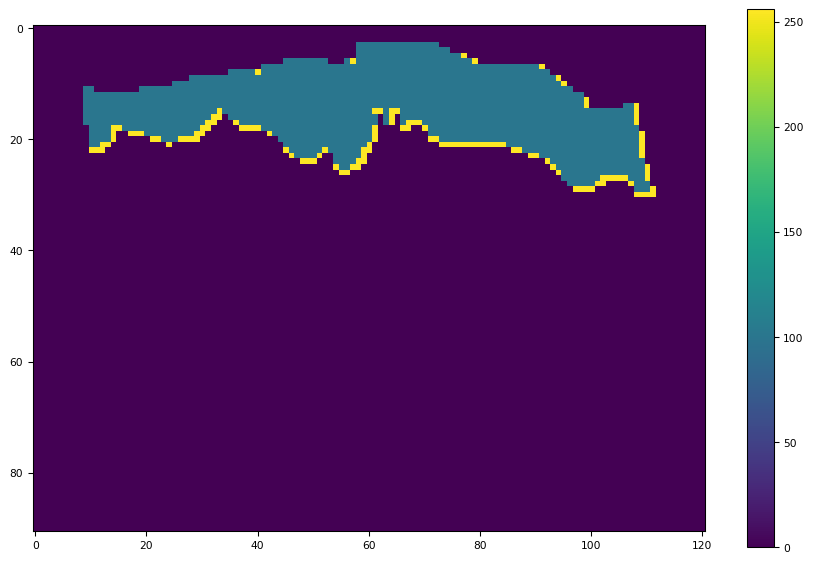

In [108]:
mask_coef = (4 ** 1) * 256 // (4 ** 2)
mask2 = mask[::mask_coef, ::mask_coef].copy()
coef = (4 ** 1) * 256

a = df[(df['tumor_ratio'] > 0.9) & (df['blank_ratio'] > 0.5)]
print(a.shape[0])

for i, row in df.iterrows():
    xnew = row['x'] // coef
    ynew = row['y'] // coef
    if xnew < mask2.shape[1] and ynew < mask2.shape[0] and row['blank_ratio'] < 0.5:
        mask2[ynew, xnew] = 100
    
tifffile.imshow(mask2)

# Step 2: Color normalization
- Macenko
- Vahadane

### target / reference and blank patches

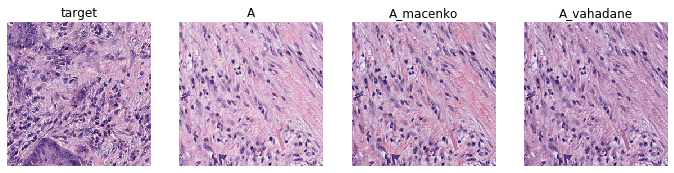

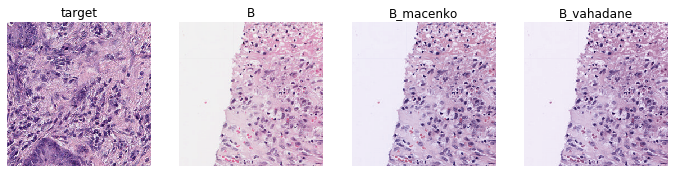

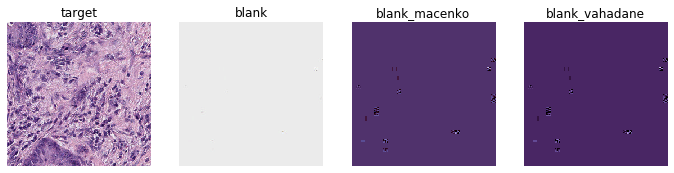

In [48]:
# load image
target_patch_fname = '../data/training_data_45_l1_28672_79872.tif'
blank_patch_fname = '../data/blank.tif'
a_patch_fname = '/mnt/h/PAIP2020/training/patch_level1_256/training_data_01/training_data_01_l1_83968_43008.tif'
b_patch_fname = '/mnt/h/PAIP2020/training/patch_level1_256/training_data_47/training_data_47_l1_9216_11264.tif'

target = staintools.read_image(target_patch_fname)
blank = staintools.read_image(blank_patch_fname)
a = staintools.read_image(a_patch_fname)
b = staintools.read_image(b_patch_fname)

# normalizer
normalizer_macenko = staintools.StainNormalizer(method='Macenko')
normalizer_macenko.fit(target)
normalizer_vahadane = staintools.StainNormalizer(method='Vahadane')
normalizer_vahadane.fit(target)

blank_macenko = normalizer_macenko.transform(blank)
blank_vahadane = normalizer_vahadane.transform(blank)
a_macenko = normalizer_macenko.transform(a)
a_vahadane = normalizer_vahadane.transform(a)
b_macenko = normalizer_macenko.transform(b)
b_vahadane = normalizer_vahadane.transform(b)

# visualization
staintools.plot_image_list(
    images=[target, a, a_macenko, a_vahadane], 
    title_list=['target', 'A', 'A_macenko', 'A_vahadane'], 
    width=6, save_name=None)

staintools.plot_image_list(
    images=[target, b, b_macenko, b_vahadane], 
    title_list=['target', 'B', 'B_macenko', 'B_vahadane'], 
    width=6, save_name=None)

staintools.plot_image_list(
    images=[target, blank, blank_macenko, blank_vahadane], 
    title_list=['target', 'blank', 'blank_macenko', 'blank_vahadane'], 
    width=6, save_name=None)

### normalize batch

In [ ]:
# %%time

# method = 'vahadane'

# for i in range(1, 47+1):
#     sample = 'training_data_{:02d}'.format(i)
#     indir = '/mnt/e/PAIP2020/training/patch_level1_256/' + sample
#     outdir = '/mnt/h/PAIP2020/patch_level1_256_' + method + '/' + sample
    
#     if os.path.isdir(outdir):
#         print('{} Exists.'.format(sample))
#         continue
#     else:
#         os.makedirs(outdir, exist_ok=True)

#     for fn_base in os.listdir(indir):
#         fn_source = os.path.join(indir, fn_base)
#         source = staintools.read_image(fn_source)
#         source_normalized = dict_normalizer[method].transform(source)

#         fn_normalized = os.path.join(outdir, os.path.splitext(fn_base)[0] + '_' + method + '.tif')
#         tifffile.imsave(fn_normalized, source_normalized, compress=9)
        
#     print('{} Done.'.format(sample))

# Step 3: Make patch table
 - training set: 9 MSI + 26 MSS
 - validation set: 3 MSI + 9 MSS

In [36]:
phase = 'test'
csvdir = '/mnt/e/PAIP2020/data/dataset_' + phase + '/'
datadir = "/mnt/h/PAIP2020/" + phase + '/'

print(csvdir)
print(datadir)

/mnt/e/PAIP2020/data/dataset_test/
/mnt/h/PAIP2020/test/


In [37]:
df_msi = pd.read_csv(datadir + 'wsi_label.csv')
print(df_msi.shape)
df_msi.head(1)

(40, 2)


,wsi,msi
0,test_data_01,0


In [41]:
def make_patch_table(stat_fname, img_dir, df_msi=None, suffix=''):
    df = pd.read_csv(stat_fname)
    df.rename(columns={'sample': 'wsi'}, inplace=True)
    df['file'] = 'PAIP2020/' + phase + '/' + img_dir + '/' + df['wsi'] + '/' + df['patch'] + suffix + '.tif'
    
    if df_msi is not None:
        df = pd.merge(df_msi, df)
    
    for i in range(10):
        img_fname = df['file'][i]
        assert os.path.exists('/mnt/h/' + img_fname), 'Not exists: ' + img_fname
    
    return df

## level 0 (40X)

In [8]:
indir = '../data/dataset_validation/'

df0 = make_patch_table(
    stat_fname=indir + 'statistics_patch_level0.csv', 
    img_dir='patch_level0_512_macenko')

# df0.to_csv(indir + 'summary_patch_level0.csv', index=False)
print('Level 0:\t', df0.shape)

# df_train = df0[df0['dataset'] == 'train']
# df_val = df0[df0['dataset'] == 'val']
# df_train.to_csv(indir + 'summary_patch_level0_train.csv', index=False)
# df_val.to_csv(indir + 'summary_patch_level0_val.csv', index=False)
# print('Train:\t', df_train.shape)
# print('Val:\t', df_val.shape)

df0.head(1)

/mnt/f/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Level 0:	 (171933, 11)


,wsi,patch,level,x,y,size,tumor_ratio,blank_ratio,file,mega_patch_size,msi
0,validation_data_01,validation_data_01_l0_27136_86016,0,27136,86016,512,1.0,0.0,PAIP2020/validation/patch_level0_512_macenko/v...,4,0


## level 1 (10X)

In [44]:
df1 = make_patch_table(
    stat_fname=csvdir + 'statistics_overlap_patch_level1_1024.csv', 
    img_dir='overlap_patch_level1_1024_macenko', 
    df_msi=df_msi)

# df1.to_csv(csvdir + 'overlap_patch_level1_1024.csv', index=False)
print('Level 1:\t', df1.shape)

# df_train = df1[df1['dataset'] == 'train']
# df_val = df1[df1['dataset'] == 'val']
# df_train.to_csv(indir + 'summary_patch_level1_1024_train.csv', index=False)
# df_val.to_csv(indir + 'summary_patch_level1_1024_val.csv', index=False)
# print('Train:\t', df_train.shape)
# print('Val:\t', df_val.shape)

df1.head(1)

Level 1:	 (12176, 10)


,wsi,msi,patch,level,x,y,size,tumor_ratio,blank_ratio,file
0,test_data_01,0,test_data_01_l1_77824_65536,1,77824,65536,1024,0.769455,0.0,PAIP2020/test/overlap_patch_level1_1024_macenk...


## level 2 (2.5X)

In [19]:
df2 = make_patch_table(
    stat_fname=csvdir + 'statistics_patch_level2_256.csv', 
    img_dir='patch_level2_256_macenko', 
    df_msi=df_msi)

# df2.to_csv(csvdir + 'patch_level2.csv', index=False)
print('Level 2:\t', df2.shape)

# df_train = df2[df2['dataset'] == 'train']
# df_val = df2[df2['dataset'] == 'val']
# df_train.to_csv('../data/dataset/summary_patch_level2_train.csv', index=False)
# df_val.to_csv('../data/dataset/summary_patch_level2_val.csv', index=False)
# print('Train:\t', df_train.shape)
# print('Val:\t', df_val.shape)

df2.head(1)

Level 2:	 (2984, 10)


,wsi,msi,patch,level,x,y,size,tumor_ratio,blank_ratio,file
0,test_data_01,0,test_data_01_l2_77824_65536,2,77824,65536,256,0.769455,0.0,PAIP2020/test/patch_level2_256_macenko/test_da...


## Level 2 (2.5X, 256) + Level 1 (10X, 1024)

In [45]:
df1 = pd.read_csv(csvdir + 'overlap_patch_level2.csv')
df2 = pd.read_csv(csvdir + 'overlap_patch_level1_1024.csv')

df1 = df1[['wsi', 'msi', 'x', 'y', 'file']]
df1.columns = ['wsi', 'msi', 'x', 'y', 'file1']
df2 = df2[['wsi', 'x', 'y', 'file']]
df2.columns = ['wsi', 'x', 'y', 'file2']

df = pd.merge(df1, df2)
df.to_csv(csvdir + 'overlap_multiscale_patch.csv', index=False)

# df_train = df[df['dataset'] == 'train']
# df_val = df[df['dataset'] == 'val']
# df_train.to_csv('../data/dataset_training/summary_patch_level2_level1_train.csv', index=False)
# df_val.to_csv('../data/dataset_training/summary_patch_level2_level1_val.csv', index=False)

print(df.shape)
df.head(1)

(11899, 6)


,wsi,msi,x,y,file1,file2
0,test_data_01,0,77824,65536,PAIP2020/test/overlap_patch_level2_256_macenko...,PAIP2020/test/overlap_patch_level1_1024_macenk...


## Merge training and validation

In [3]:
df1 = pd.read_csv('../data/dataset_training/patch_level1_1024.csv')
df1['dataset'] = 'train'

df2 = pd.read_csv('../data/dataset_validation/patch_level1_1024.csv')
df2.drop('msi', axis=1, inplace=True)
df2['dataset'] = 'val'
t = pd.read_csv('../data/dataset_validation/summary_wsi.csv')
t = t[t['msi'] != -1]
df2 = pd.merge(df2, t)

df = pd.concat([df1, df2])

df_train = df[df['dataset'] == 'train']
df_val = df[df['dataset'] == 'val']

df.to_csv('../data/dataset_trainval/patch_level1_1024.csv', index=False)
df_train.to_csv('../data/dataset_trainval/patch_level1_1024_train.csv', index=False)
df_val.to_csv('../data/dataset_trainval/patch_level1_1024_val.csv', index=False)

## wsi table

In [18]:
t0 = df0.groupby(['dataset', 'wsi', 'wsi_id', 'msi', 'level', 'size']).size().to_frame('num_patches').reset_index()
t1 = df1.groupby(['dataset', 'wsi', 'wsi_id', 'msi', 'level', 'size']).size().to_frame('num_patches').reset_index()
t2 = df2.groupby(['dataset', 'wsi', 'wsi_id', 'msi', 'level', 'size']).size().to_frame('num_patches').reset_index()

df_wsi = pd.concat([t0, t1, t2])
# df_wsi.to_csv('../data/dataset/summary_wsi.csv', index=False)

print(df_wsi.shape)
df_wsi.head(1)

(141, 7)


,dataset,wsi,wsi_id,msi,level,size,num_patches
0,train,training_data_01,1,1,0,512,5289


#### class table

In [14]:
t1 = df2.groupby(['dataset', 'msi']).size()
t1.name = 'n_wsi'
t1 = t1.to_frame()

t2 = df2.groupby(['dataset', 'msi'])['n_patch'].sum()
t2.name = 'n_patch'
t2 = t2.to_frame()

t3 = df2.groupby(['dataset', 'msi'])['wsi_id'].agg(lambda x: ','.join(map(str, x)))
t3.name = 'wsi_id'
t3 = t3.to_frame()

df3 = pd.concat([t1, t2], axis=1)
# df3.to_csv('../data/summary_class.xls', sep='\t')

df3

n_wsi  n_patch
dataset msi                
train   0       26    33076
        1        9    13869
val     0        9     7516
        1        3     5913

# Step 4: Miscellaneous

### Create XML of given patch

In [3]:
in_xml = '../data/template.xml'
out_xml = '../patch.xml'

len_patch=256
level_patch=1
size = int(len_patch * (4 ** level_patch))
x = 78848
y = 44032

# utils.create_xml(in_xml, out_xml, x, y, size)

### Assemble patches

105


(<Figure size 988.8x604.8 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f9f7b8fa9d0>)

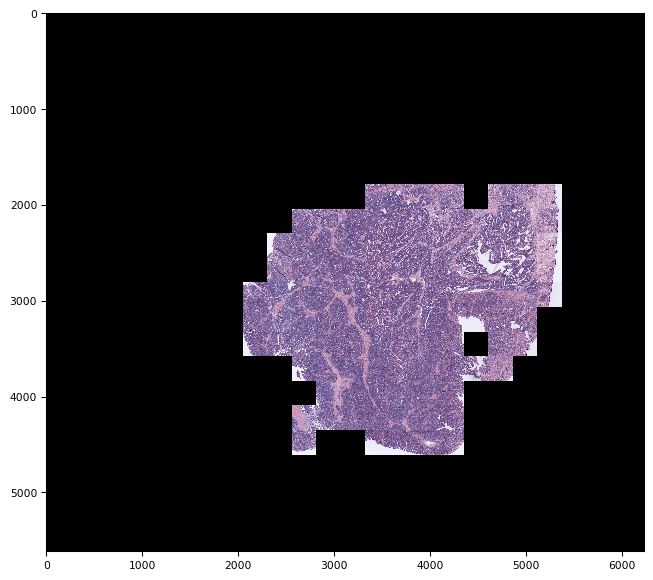

In [6]:
img = utils.assemble_patch(training_dir + 'patch_level2_256_macenko/training_data_35', 
                           2, 256, 95616, 85702)
tifffile.imshow(img)

In [19]:
a = img[::2, ::2, :]

In [18]:
tifffile.imsave('../figure/training_data_35_level2_macenko_patch2.tif', a, compress=9)

(<Figure size 988.8x604.8 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f9f7b2f4d50>)

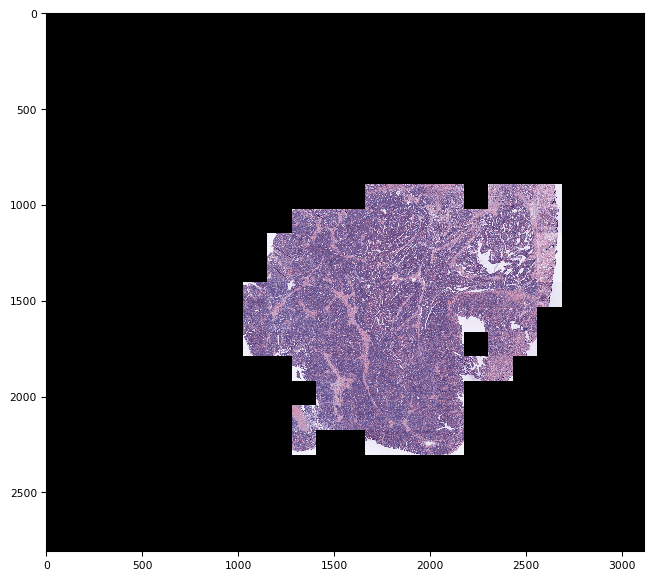

In [20]:
tifffile.imshow(a)

# Step 5: Input for siamese network

In [2]:
df = pd.read_csv('../data/dataset/summary_patch_level1.csv')
print(df.shape)
df.head(1)

(60374, 14)


,wsi,msi,wsi_id,dataset,patch,level,x,y,size,tumor_ratio,blank_ratio,file,coord,split
0,training_data_01,1,1,train,training_data_01_l1_48128_76800,1,48128,76800,256,0.997803,0.035156,PAIP2020/training/patch_level1_256_macenko/tra...,"(48128, 76800)",2


In [3]:
df.head(2)

,wsi,msi,wsi_id,dataset,patch,level,x,y,size,tumor_ratio,blank_ratio,file,coord,split
0,training_data_01,1,1,train,training_data_01_l1_48128_76800,1,48128,76800,256,0.997803,0.035156,PAIP2020/training/patch_level1_256_macenko/tra...,"(48128, 76800)",2
1,training_data_01,1,1,train,training_data_01_l1_48128_77824,1,48128,77824,256,1.000000,0.000000,PAIP2020/training/patch_level1_256_macenko/tra...,"(48128, 77824)",2
